In [9]:
#import necessary Packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [10]:
#upload the csv file
data = pd.read_csv('phishing.csv')
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [11]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [12]:
#number of columns
len(data.columns)

32

In [13]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

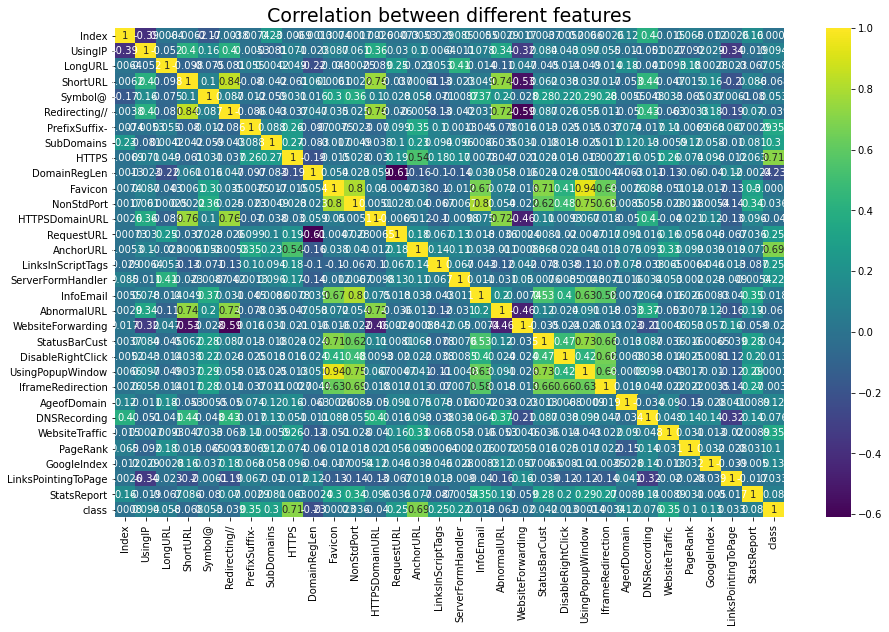

In [14]:
#correlation between different features are
X = data.drop(["class","Index"],axis =1)
y = data["class"]
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 19, c='black')
plt.show()

In [15]:
corr=data.corr()
corr.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,1.000000,-0.388620,0.006441,-0.006221,-0.169437,-0.003771,-0.007402,0.233936,-0.006899,-0.001290,...,0.006593,0.002583,0.115175,0.400751,-0.015147,0.065034,-0.012466,0.002623,0.163479,0.000802
UsingIP,-0.388620,1.000000,-0.052159,0.403547,0.158766,0.397220,-0.005306,-0.080921,0.071255,-0.022830,...,0.096953,0.054739,-0.010580,-0.050929,0.002728,-0.091857,0.029206,-0.338971,-0.019420,0.094033
LongURL,0.006441,-0.052159,1.000000,-0.097976,-0.075205,-0.080788,0.055334,0.004249,0.049033,-0.221807,...,-0.049486,-0.013902,0.179678,-0.040549,0.009296,0.183672,0.002825,-0.023216,-0.066708,0.057661
ShortURL,-0.006221,0.403547,-0.097976,1.000000,0.104433,0.843149,-0.080458,-0.041874,-0.061383,0.060950,...,0.036599,0.016570,-0.052562,0.436163,-0.047025,0.014612,0.155832,-0.198463,0.085572,-0.067931
Symbol@,-0.169437,0.158766,-0.075205,0.104433,1.000000,0.087086,-0.011711,-0.058931,0.031275,0.015549,...,0.290880,0.284401,-0.005459,-0.047820,0.032981,-0.064714,0.037047,-0.006124,-0.080286,0.052994


In [16]:
corr['class']=abs(corr['class'])
corr.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,1.000000,-0.388620,0.006441,-0.006221,-0.169437,-0.003771,-0.007402,0.233936,-0.006899,-0.001290,...,0.006593,0.002583,0.115175,0.400751,-0.015147,0.065034,-0.012466,0.002623,0.163479,0.000802
UsingIP,-0.388620,1.000000,-0.052159,0.403547,0.158766,0.397220,-0.005306,-0.080921,0.071255,-0.022830,...,0.096953,0.054739,-0.010580,-0.050929,0.002728,-0.091857,0.029206,-0.338971,-0.019420,0.094033
LongURL,0.006441,-0.052159,1.000000,-0.097976,-0.075205,-0.080788,0.055334,0.004249,0.049033,-0.221807,...,-0.049486,-0.013902,0.179678,-0.040549,0.009296,0.183672,0.002825,-0.023216,-0.066708,0.057661
ShortURL,-0.006221,0.403547,-0.097976,1.000000,0.104433,0.843149,-0.080458,-0.041874,-0.061383,0.060950,...,0.036599,0.016570,-0.052562,0.436163,-0.047025,0.014612,0.155832,-0.198463,0.085572,0.067931
Symbol@,-0.169437,0.158766,-0.075205,0.104433,1.000000,0.087086,-0.011711,-0.058931,0.031275,0.015549,...,0.290880,0.284401,-0.005459,-0.047820,0.032981,-0.064714,0.037047,-0.006124,-0.080286,0.052994


In [17]:
incCorr=corr.sort_values(by='class',ascending=False)
incCorr.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
class,0.000802,0.094033,0.057661,-0.067931,0.052994,-0.038885,0.348588,0.298231,0.714704,-0.225879,...,0.000136,-0.003362,0.121402,0.075579,0.346003,0.104593,0.129000,0.032694,0.079632,1.000000
HTTPS,-0.006899,0.071255,0.049033,-0.061383,0.031275,-0.036536,0.261366,0.267531,1.000000,-0.193730,...,-0.012945,-0.002734,0.162700,0.050797,0.258625,0.074479,0.096110,-0.011569,0.063126,0.714704
AnchorURL,-0.005275,0.099701,-0.023153,0.000607,0.057968,-0.005341,0.348854,0.229374,0.535712,-0.160355,...,0.041211,0.013441,0.075393,0.093131,0.326172,0.099201,0.038866,0.018788,0.077115,0.692895
PrefixSuffix-,-0.007402,-0.005306,0.055334,-0.080458,-0.011711,-0.085709,1.000000,0.087852,0.261366,-0.096826,...,-0.014716,-0.036894,0.074083,-0.016610,0.110555,-0.006855,0.067796,0.067469,-0.002851,0.348588
WebsiteTraffic,-0.015147,0.002728,0.009296,-0.047025,0.032981,-0.062761,0.110555,-0.005948,0.258625,-0.134571,...,-0.043126,-0.022037,0.089814,0.048450,1.000000,0.030905,-0.012529,-0.019701,0.008878,0.346003


In [18]:
incCorr['class']

class                  1.000000
HTTPS                  0.714704
AnchorURL              0.692895
PrefixSuffix-          0.348588
WebsiteTraffic         0.346003
SubDomains             0.298231
RequestURL             0.253478
LinksInScriptTags      0.248415
DomainRegLen           0.225879
ServerFormHandler      0.221380
GoogleIndex            0.129000
AgeofDomain            0.121402
PageRank               0.104593
UsingIP                0.094033
StatsReport            0.079632
DNSRecording           0.075579
ShortURL               0.067931
AbnormalURL            0.060751
LongURL                0.057661
Symbol@                0.052994
StatusBarCust          0.041878
HTTPSDomainURL         0.040096
Redirecting//          0.038885
NonStdPort             0.036461
LinksPointingToPage    0.032694
WebsiteForwarding      0.020151
InfoEmail              0.018039
DisableRightClick      0.012675
IframeRedirection      0.003362
Index                  0.000802
Favicon                0.000231
UsingPop

In [19]:
tenfeatures=incCorr[1:11].index
twenfeatures=incCorr[1:21].index

In [20]:
#Structutre to Store metrics
ML_Model = []
accuracy = []
f1_score = []
precision = []

def storeResults(model, a,b,c):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  precision.append(round(c, 3))

In [21]:
#KNN
def KNN(X):
  x=[a for a in range(1,10,2)]
  knntrain=[]
  knntest=[]
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  X_train.shape, y_train.shape, X_test.shape, y_test.shape
  for i in range(1,10,2):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_knn = knn.predict(X_train)
    y_test_knn = knn.predict(X_test)
    acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
    acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
    print("K-Nearest Neighbors with k={}: Accuracy on training Data: {:.3f}".format(i,acc_train_knn))
    print("K-Nearest Neighbors with k={}: Accuracy on test Data: {:.3f}".format(i,acc_test_knn))
    knntrain.append(acc_train_knn)
    knntest.append(acc_test_knn)
    print()
  import matplotlib.pyplot as plt
  plt.plot(x,knntrain,label="Train accuracy")
  plt.plot(x,knntest,label="Test accuracy")
  plt.legend()
  plt.show()

K-Nearest Neighbors with k=1: Accuracy on training Data: 0.989
K-Nearest Neighbors with k=1: Accuracy on test Data: 0.956

K-Nearest Neighbors with k=3: Accuracy on training Data: 0.976
K-Nearest Neighbors with k=3: Accuracy on test Data: 0.946

K-Nearest Neighbors with k=5: Accuracy on training Data: 0.965
K-Nearest Neighbors with k=5: Accuracy on test Data: 0.941

K-Nearest Neighbors with k=7: Accuracy on training Data: 0.958
K-Nearest Neighbors with k=7: Accuracy on test Data: 0.936

K-Nearest Neighbors with k=9: Accuracy on training Data: 0.953
K-Nearest Neighbors with k=9: Accuracy on test Data: 0.938



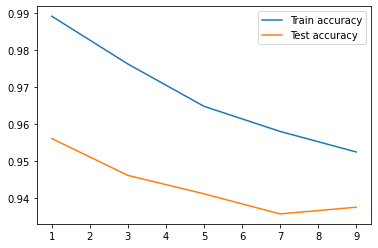

In [22]:
Xmain=X
Xten=X[tenfeatures]
Xtwen=X[twenfeatures]

KNN(Xmain)

K-Nearest Neighbors with k=1: Accuracy on training Data: 0.940
K-Nearest Neighbors with k=1: Accuracy on test Data: 0.928

K-Nearest Neighbors with k=3: Accuracy on training Data: 0.945
K-Nearest Neighbors with k=3: Accuracy on test Data: 0.939

K-Nearest Neighbors with k=5: Accuracy on training Data: 0.947
K-Nearest Neighbors with k=5: Accuracy on test Data: 0.938

K-Nearest Neighbors with k=7: Accuracy on training Data: 0.944
K-Nearest Neighbors with k=7: Accuracy on test Data: 0.935

K-Nearest Neighbors with k=9: Accuracy on training Data: 0.942
K-Nearest Neighbors with k=9: Accuracy on test Data: 0.937



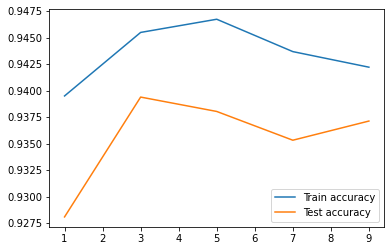

In [23]:
KNN(Xten)

K-Nearest Neighbors with k=1: Accuracy on training Data: 0.981
K-Nearest Neighbors with k=1: Accuracy on test Data: 0.951

K-Nearest Neighbors with k=3: Accuracy on training Data: 0.970
K-Nearest Neighbors with k=3: Accuracy on test Data: 0.940

K-Nearest Neighbors with k=5: Accuracy on training Data: 0.960
K-Nearest Neighbors with k=5: Accuracy on test Data: 0.942

K-Nearest Neighbors with k=7: Accuracy on training Data: 0.956
K-Nearest Neighbors with k=7: Accuracy on test Data: 0.939

K-Nearest Neighbors with k=9: Accuracy on training Data: 0.950
K-Nearest Neighbors with k=9: Accuracy on test Data: 0.938



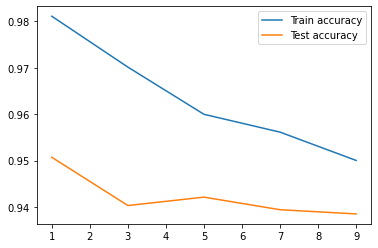

In [24]:
KNN(Xtwen)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)

In [26]:
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,precision_score_train_knn)

In [27]:
def SVM(X, y):
    x=[a for a in range(1,10,2)]
    svmtrain=[]
    svmtest=[]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    X_train.shape, y_train.shape, X_test.shape, y_test.shape
    from sklearn.svm import SVC
    for i in range(1,10,2):
        svm = SVC(kernel='linear', C=i)
        svm.fit(X_train, y_train)
        y_train_svm = svm.predict(X_train)
        y_test_svm = svm.predict(X_test)
        acc_train_svm = metrics.accuracy_score(y_train, y_train_svm)
        acc_test_svm = metrics.accuracy_score(y_test, y_test_svm)
        print("SVM with C={}: Accuracy on training Data: {:.3f}".format(i,acc_train_svm))
        print("SVM with C={}: Accuracy on test Data: {:.3f}".format(i,acc_test_svm))
        svmtrain.append(acc_train_svm)
        svmtest.append(acc_test_svm)
        print()
    import matplotlib.pyplot as plt
    plt.plot(x,svmtrain,label="Train accuracy")
    plt.plot(x,svmtest,label="Test accuracy")
    plt.legend()
    plt.show()

SVM with C=1: Accuracy on training Data: 0.926
SVM with C=1: Accuracy on test Data: 0.935

SVM with C=3: Accuracy on training Data: 0.926
SVM with C=3: Accuracy on test Data: 0.935

SVM with C=5: Accuracy on training Data: 0.926
SVM with C=5: Accuracy on test Data: 0.935

SVM with C=7: Accuracy on training Data: 0.926
SVM with C=7: Accuracy on test Data: 0.935

SVM with C=9: Accuracy on training Data: 0.926
SVM with C=9: Accuracy on test Data: 0.935



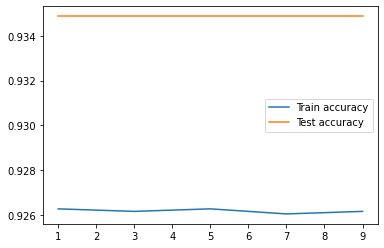

In [28]:
Xmain=X
Xten=X[tenfeatures]
Xtwen=X[twenfeatures]

SVM(Xmain,y)

SVM with C=1: Accuracy on training Data: 0.919
SVM with C=1: Accuracy on test Data: 0.925

SVM with C=3: Accuracy on training Data: 0.919
SVM with C=3: Accuracy on test Data: 0.925

SVM with C=5: Accuracy on training Data: 0.919
SVM with C=5: Accuracy on test Data: 0.925

SVM with C=7: Accuracy on training Data: 0.919
SVM with C=7: Accuracy on test Data: 0.925

SVM with C=9: Accuracy on training Data: 0.919
SVM with C=9: Accuracy on test Data: 0.925



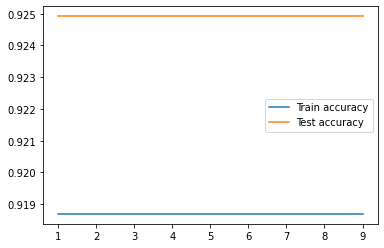

In [29]:
SVM(Xten,y)

SVM with C=1: Accuracy on training Data: 0.920
SVM with C=1: Accuracy on test Data: 0.929

SVM with C=3: Accuracy on training Data: 0.920
SVM with C=3: Accuracy on test Data: 0.929

SVM with C=5: Accuracy on training Data: 0.920
SVM with C=5: Accuracy on test Data: 0.929

SVM with C=7: Accuracy on training Data: 0.920
SVM with C=7: Accuracy on test Data: 0.929

SVM with C=9: Accuracy on training Data: 0.920
SVM with C=9: Accuracy on test Data: 0.929



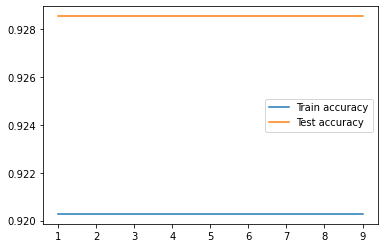

In [30]:
SVM(Xtwen,y)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)


y_train_svm = svm.predict(X_train)
y_test_svm = svm.predict(X_test)


acc_train_svm = metrics.accuracy_score(y_train, y_train_svm)
acc_test_svm = metrics.accuracy_score(y_test, y_test_svm)

f1_score_train_svm = metrics.f1_score(y_train, y_train_svm)
f1_score_test_svm = metrics.f1_score(y_test, y_test_svm)

precision_score_train_svm = metrics.precision_score(y_train, y_train_svm)
precision_score_test_svm = metrics.precision_score(y_test, y_test_svm)

print("SVM with C={}: Accuracy on training data: {:.3f}".format(1, acc_train_svm))
print("SVM with C={}: Accuracy on test data: {:.3f}".format(1, acc_test_svm))
print("SVM with C={}: F1 score on training data: {:.3f}".format(1, f1_score_train_svm))
print("SVM with C={}: F1 score on test data: {:.3f}".format(1, f1_score_test_svm))
print("SVM with C={}: Precision on training data: {:.3f}".format(1, precision_score_train_svm))
print("SVM with C={}: Precision on test data: {:.3f}".format(1, precision_score_test_svm))

SVM with C=1: Accuracy on training data: 0.926
SVM with C=1: Accuracy on test data: 0.935
SVM with C=1: F1 score on training data: 0.934
SVM with C=1: F1 score on test data: 0.942
SVM with C=1: Precision on training data: 0.926
SVM with C=1: Precision on test data: 0.930


In [32]:
storeResults('Support Vector Machines',acc_test_svm,f1_score_test_svm,precision_score_train_svm)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [34]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [35]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [36]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,precision_score_train_gbc)

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974



In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score

In [39]:
X = data.drop(["class","Index"],axis =1)
Y = data["class"]

In [40]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [41]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

In [42]:
logreg_predict= model_1.predict(test_X)

In [43]:
accuracy_score(logreg_predict,test_Y)

0.9243292131444076

In [44]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.89      0.93      0.91      1401
           1       0.95      0.92      0.93      1916

    accuracy                           0.92      3317
   macro avg       0.92      0.93      0.92      3317
weighted avg       0.93      0.92      0.92      3317



In [45]:
#confusion matrix for logistic Regression
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

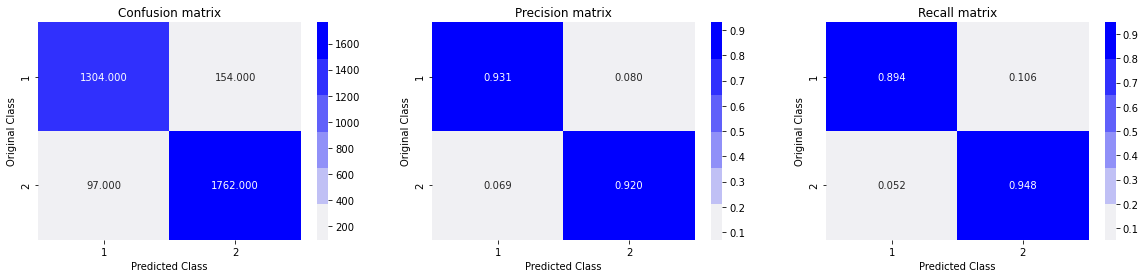

In [46]:
plot_confusion_matrix(test_Y, logreg_predict)

In [47]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [49]:
dtree_predict=model_3.predict(test_X)

In [50]:
accuracy_score(dtree_predict,test_Y)

0.9620138679529695

In [51]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96      1440
           1       0.97      0.96      0.97      1877

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



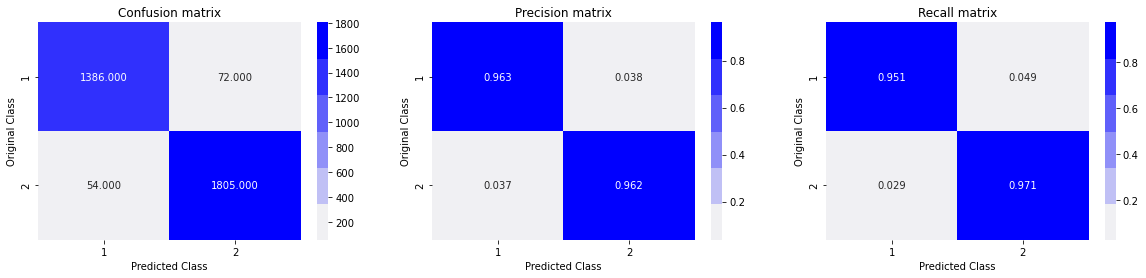

In [52]:
plot_confusion_matrix(test_Y, dtree_predict)

In [53]:
#randomForest
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

In [55]:
rfc_predict=model_4.predict(test_X)

In [56]:
accuracy_score(rfc_predict,test_Y)

0.9731685257763039

In [57]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1433
           1       0.98      0.97      0.98      1884

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



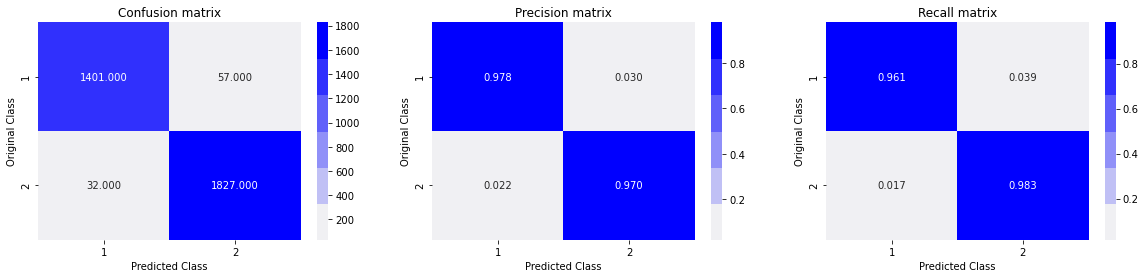

In [58]:
plot_confusion_matrix(test_Y, rfc_predict)

In [126]:
#Adaboosting Classifier
from sklearn.ensemble import AdaBoostClassifier

In [127]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

In [128]:
adc_predict=model_6.predict(test_X)

In [129]:
accuracy_score(adc_predict,test_Y)

0.9104612601748568

In [130]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



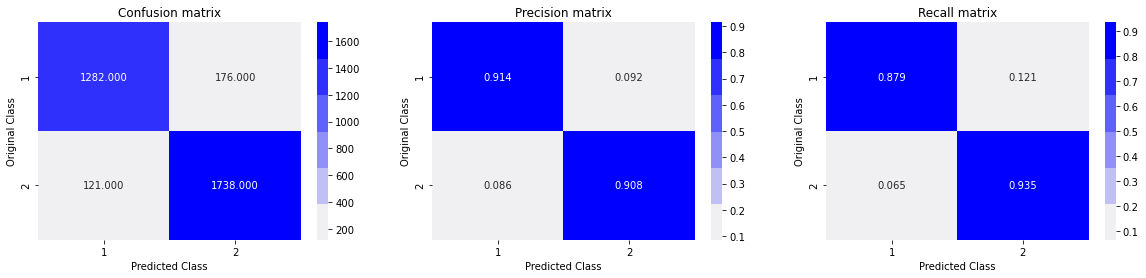

In [131]:
plot_confusion_matrix(test_Y, adc_predict)

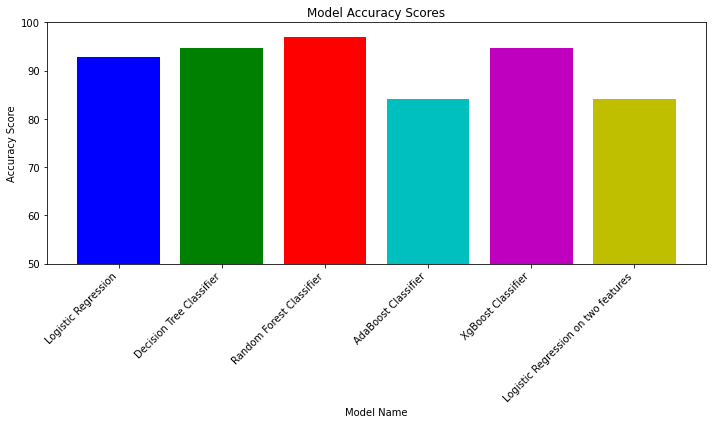

In [110]:
#comparing the models accuracy
import matplotlib.pyplot as plt

# Data
models = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier",
        "AdaBoost Classifier", "XgBoost Classifier",
          "Logistic Regression on two features"]
accuracy_scores = [92.76, 94.72, 97.05,84.11, 94.72, 84.11]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange'])
plt.ylim(50.0, 100.0)  # Set the y-axis limits from 90% to 100%
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Scores")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.tight_layout()

# Display the plot
plt.show()


In [59]:
pip install python-whois

Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [61]:
pip install python-googlesearch

In [62]:
pip install google

Note: you may need to restart the kernel to use updated packages.


In [63]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
# import google
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass


        

        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        

        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1
    
    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1
    
    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1
    
    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1
    
    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1
    
    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0
        
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording    
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic   
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1
            

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1
    
    def getFeaturesList(self):
        return self.features

In [111]:
url="https://grassform-my.sharepoint.com/:b:/g/personal/accounts_grassform_co_uk/EYsmX_DhwSVAlooW1ETKf50BIChCl1rrAfmqvTLvySTLQQ?e=UbjoWA"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =rfc.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

Caution! Suspicious website detected


In [90]:
url="https://www.google.com"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =svm.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")


We guess it is a safe website


In [112]:
url="http://www.mypublicdomainpictures.com-confirmation/"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =gbc.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

Caution! Suspicious website detected


In [100]:
url="http://paypal.com.0.security-confirmation.3408b8d8a758db7c66b435a2c13352e4.as2.2u.se/"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =svm.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

Caution! Suspicious website detected


In [103]:
url="https://www.nicasiabank.com/"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =svm.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

We guess it is a safe website


In [122]:
url="https://magazine-liquidacoes-2020.com/iphone-xr-apple-256gb-preto-4g-tela-61-retina-camera-12mp-selfie-7mp-ios-12-proc-chip-a12/ipxr/DPDU7WFX.html										"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =svm.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

Caution! Suspicious website detected


In [125]:
url="http://www.lizanderin.com/WeTransfer/"
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =svm.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

Caution! Suspicious website detected
